In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P2\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
5,2020-03-30,France,43022.0,40174.0,2715.0,2606.0,2848.0,109.0
6,2020-03-30,China,82601.0,82463.0,3308.0,3311.0,138.0,-3.0
7,2020-03-30,Italy,99266.0,97689.0,11095.0,10781.0,1577.0,314.0
8,2020-03-30,Spain,81599.0,78797.0,6594.0,6528.0,2802.0,66.0
9,2020-03-30,United States,148230.0,143025.0,2840.0,2509.0,5205.0,331.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  2404.1768826619964
RMSE =  5342.1789189853835


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  354.5148861646235
RMSE =  793.272180947245


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAPE =  11622.241379310344
RMSE =  13961.75363084007
-- World performances for deaths --
MAPE =  1670.655172413793
RMSE =  2068.90251599481


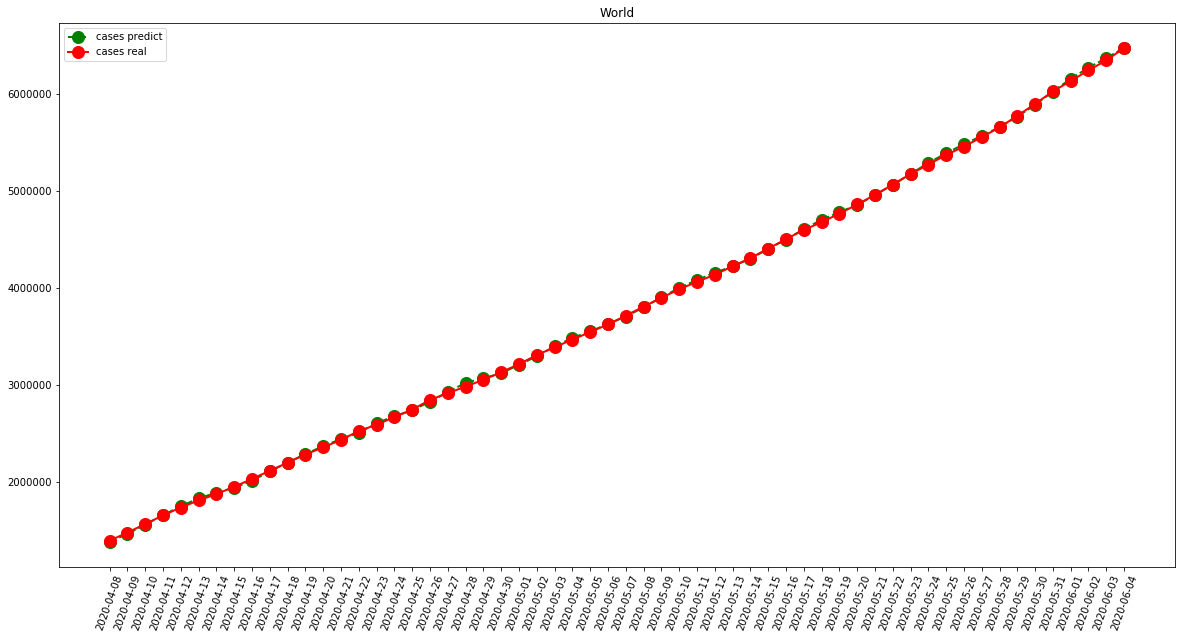

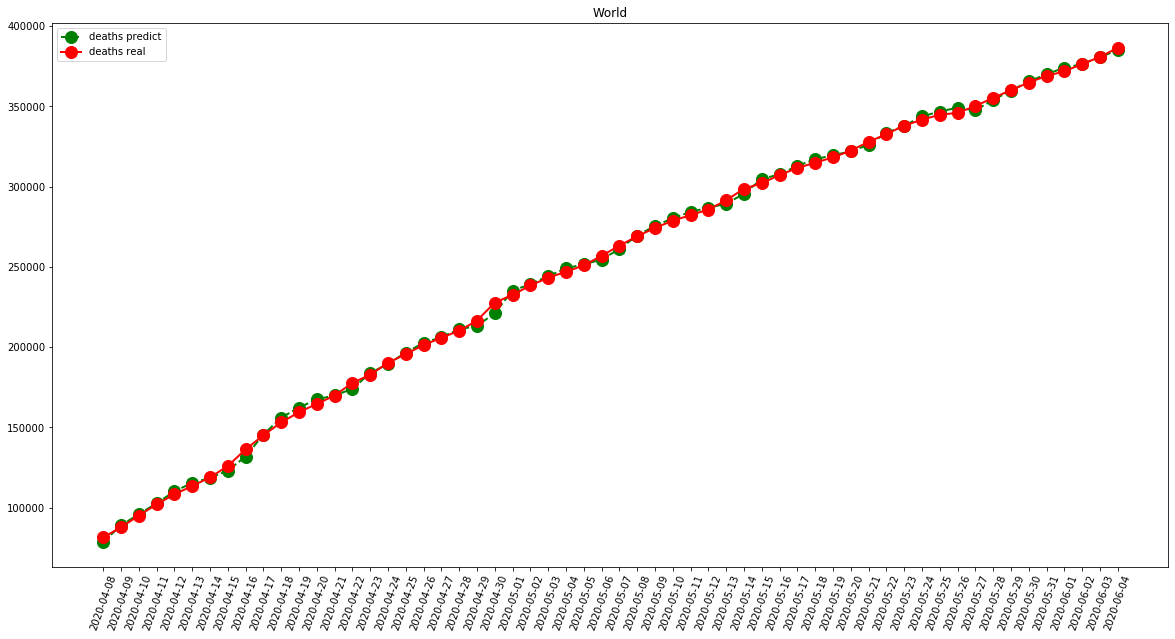

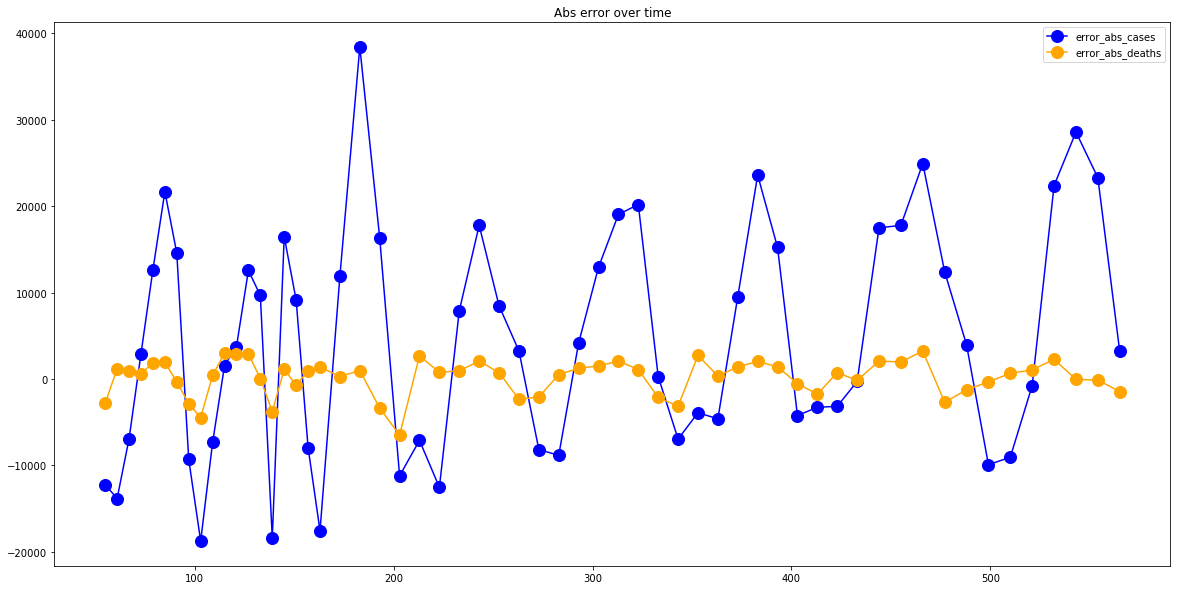

In [7]:
visShow("World")

-- France performances for cases --
MAPE =  1094.3676470588234
RMSE =  1711.0945370451868
-- France performances for deaths --
MAPE =  247.0441176470588
RMSE =  405.5430455139206


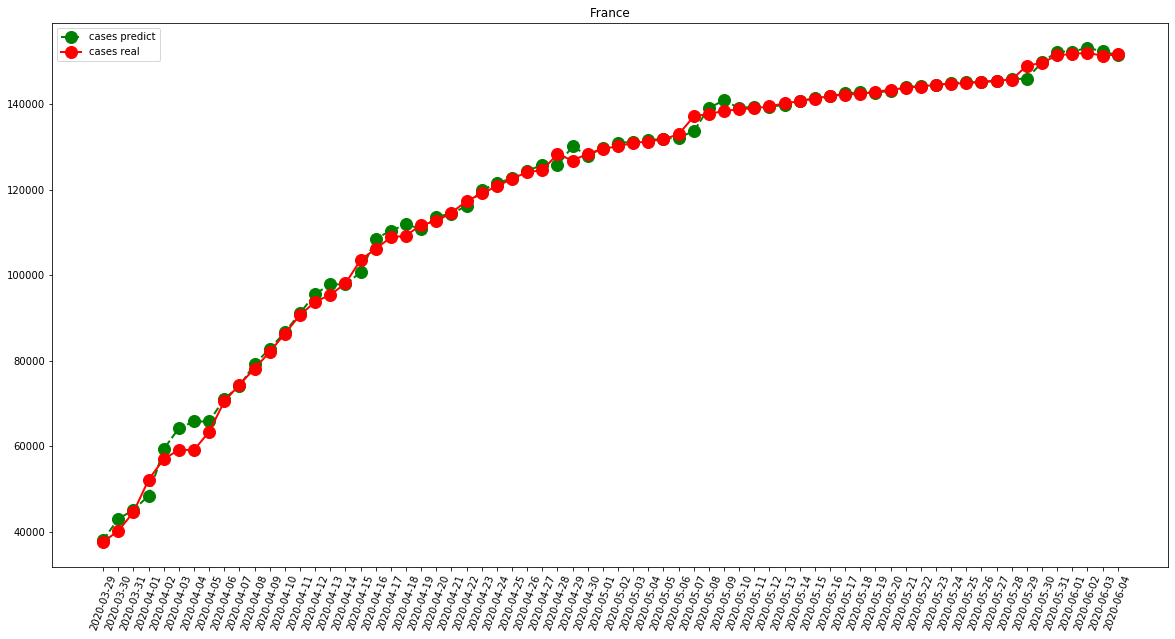

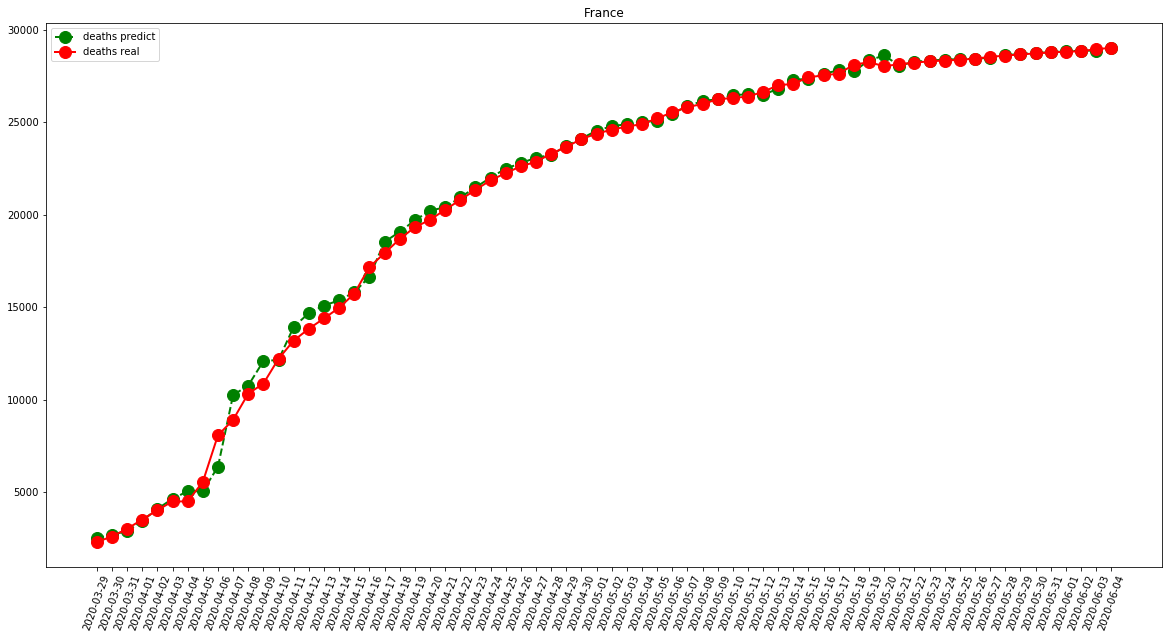

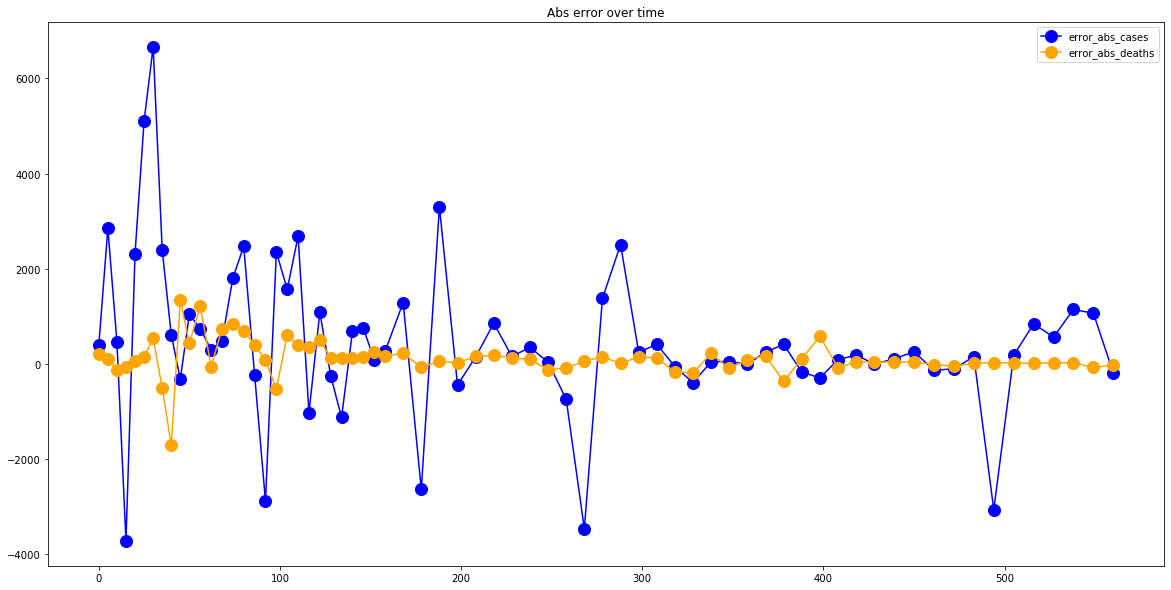

In [8]:
visShow("France")

-- Italy performances for cases --
MAPE =  465.95588235294116
RMSE =  641.4077692627275
-- Italy performances for deaths --
MAPE =  130.2941176470588
RMSE =  357.9102746581639


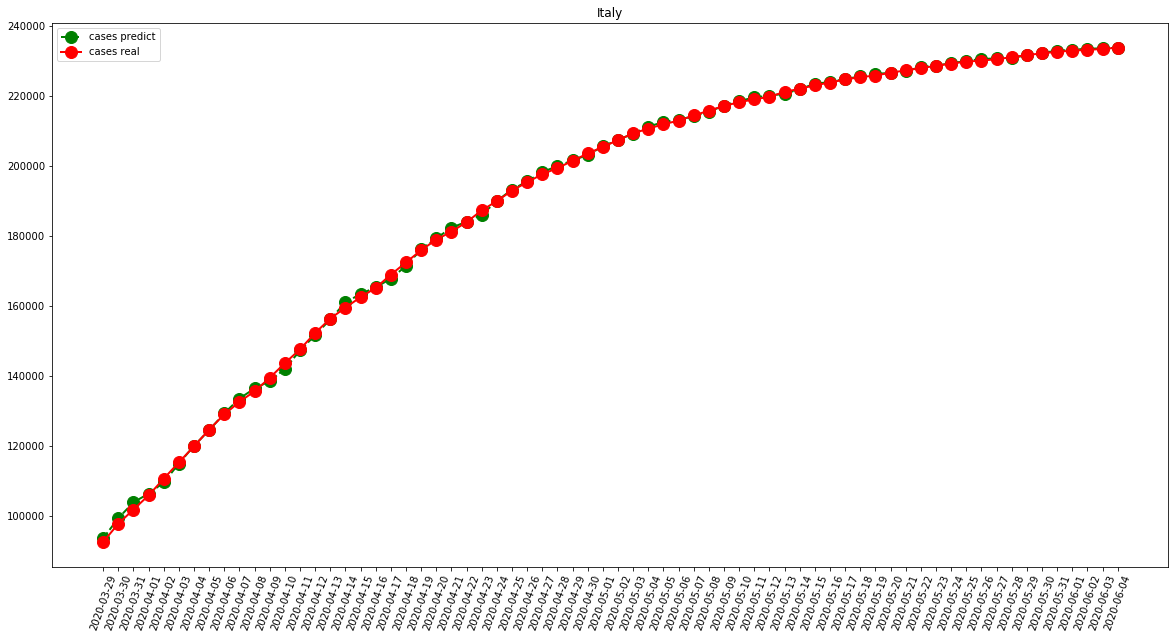

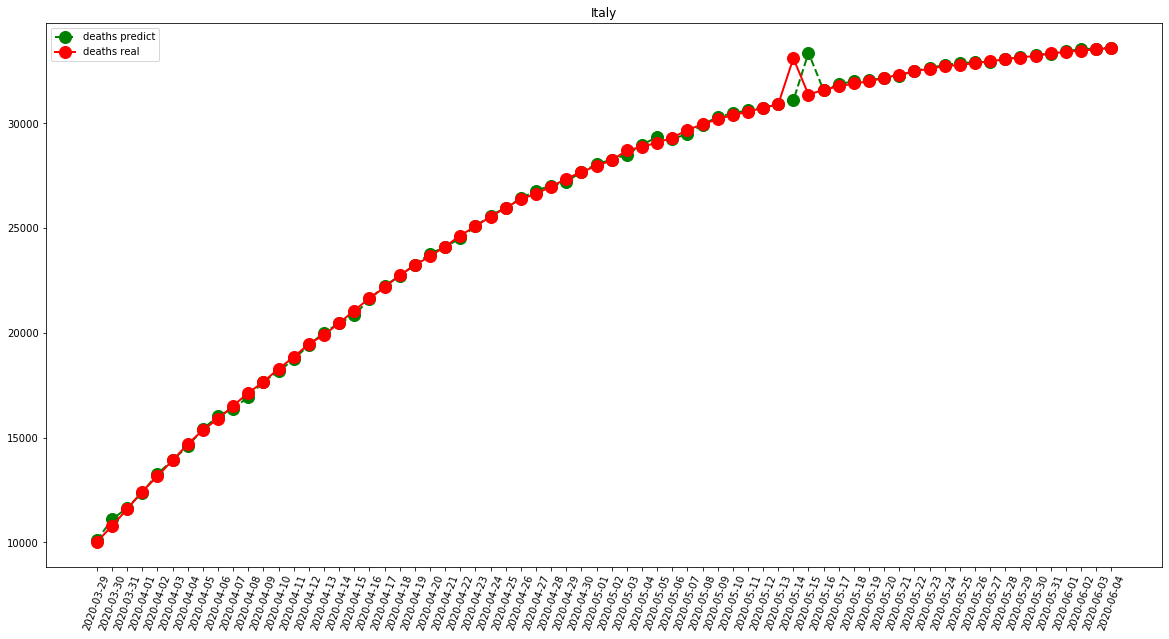

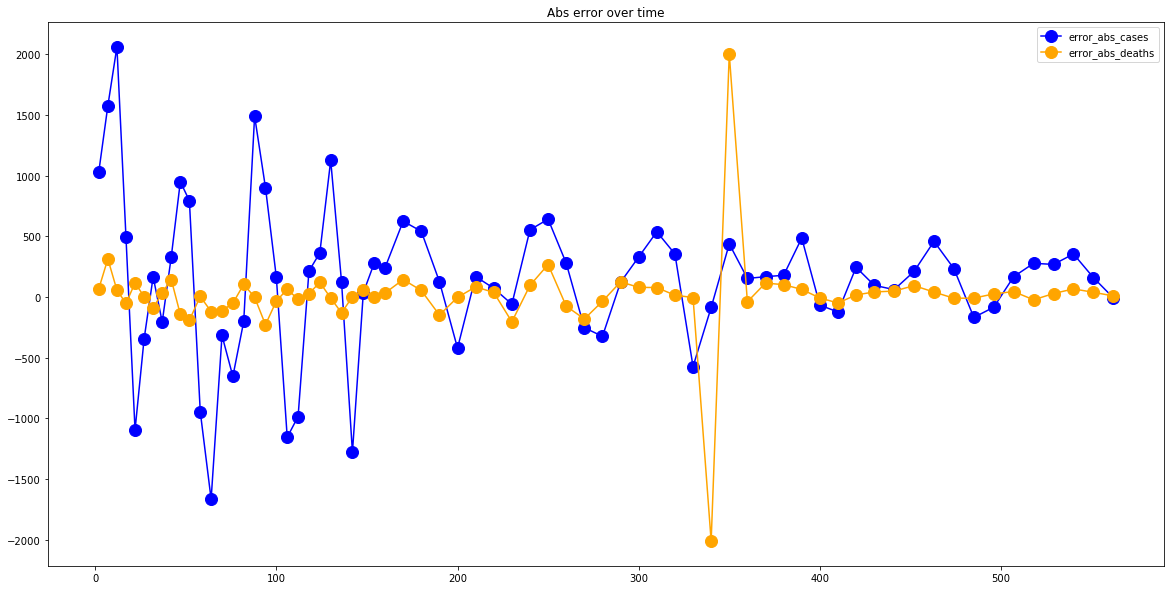

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAPE =  1166.2058823529412
RMSE =  2476.441297507373
-- Spain performances for deaths --
MAPE =  203.30882352941177
RMSE =  398.1753788884255


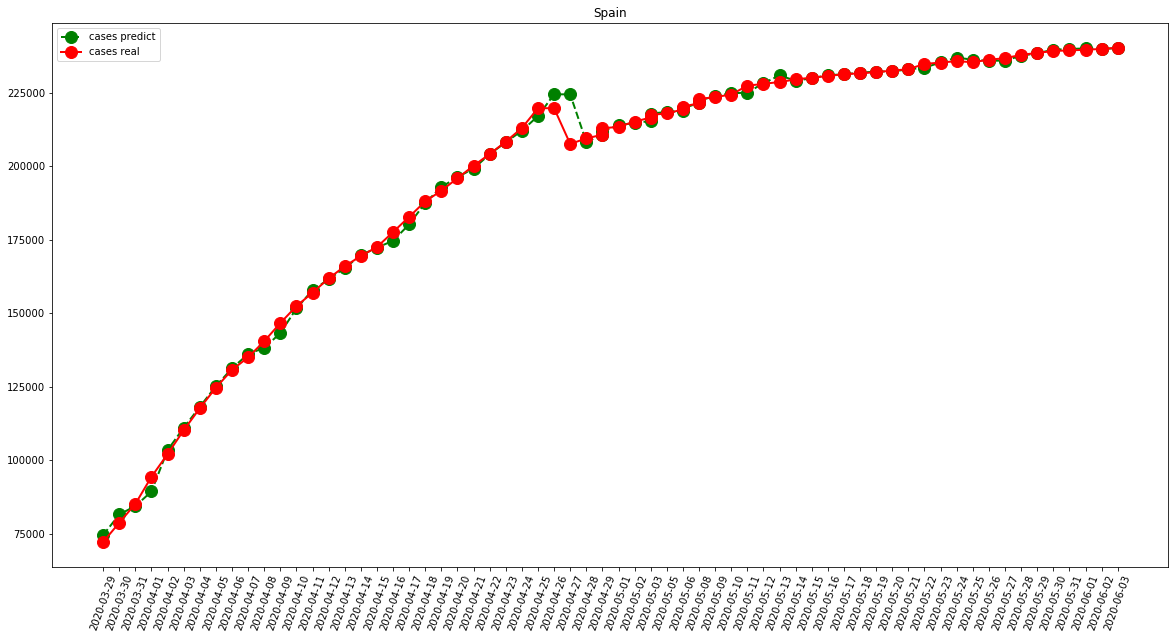

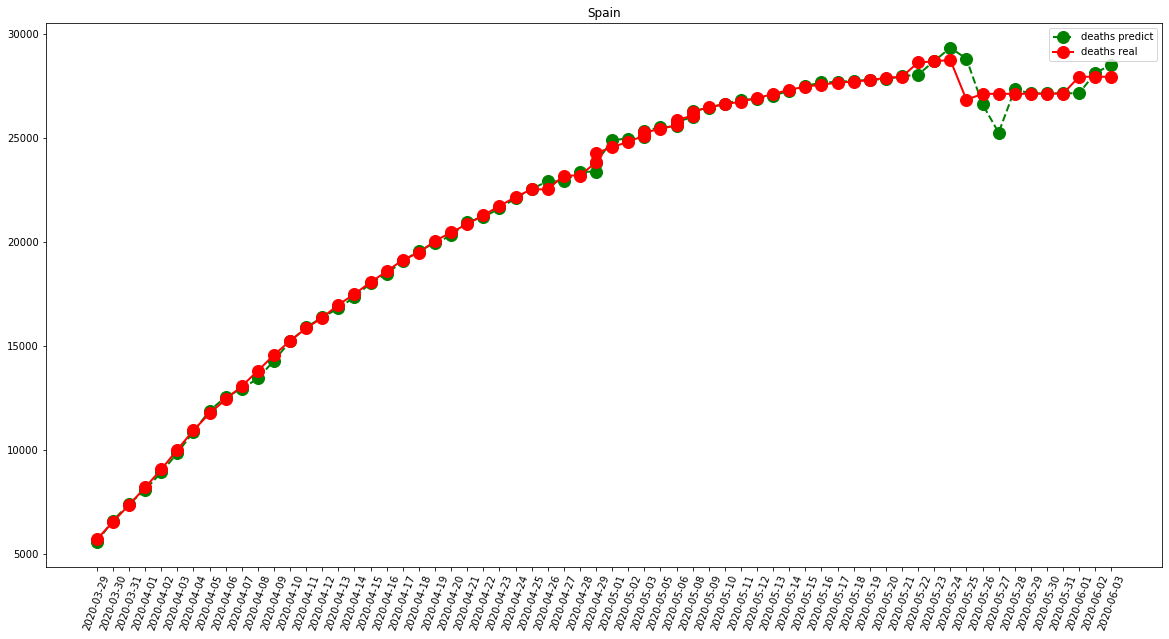

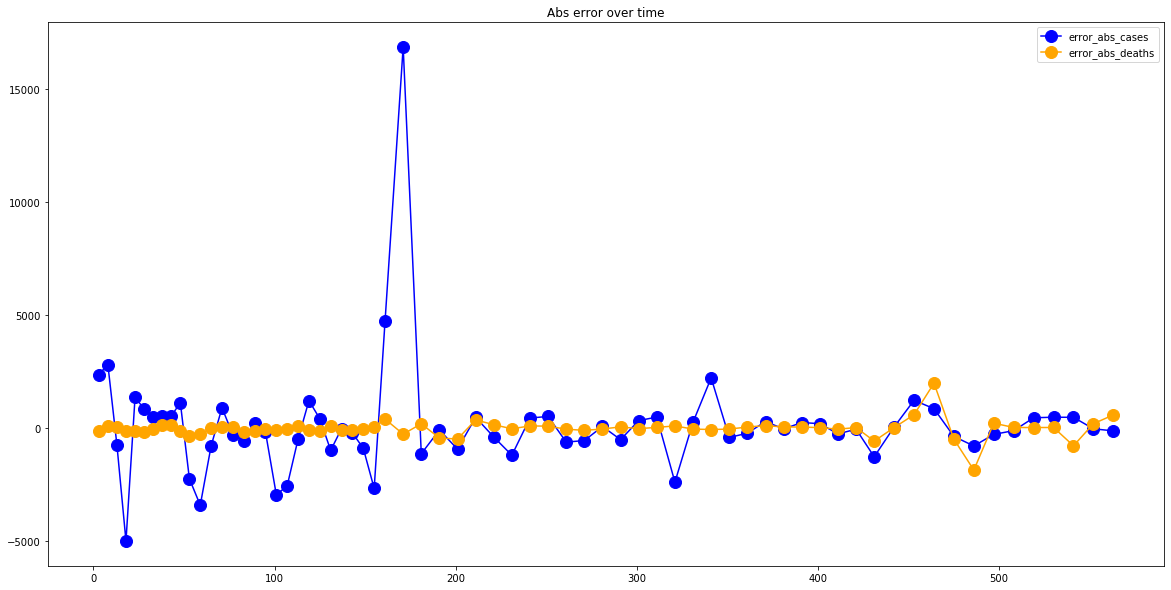

In [10]:
visShow("Spain")

-- United States performances for cases --
MAPE =  4962.955882352941
RMSE =  6978.204219736833
-- United States performances for deaths --
MAPE =  594.2647058823529
RMSE =  868.3783737519032


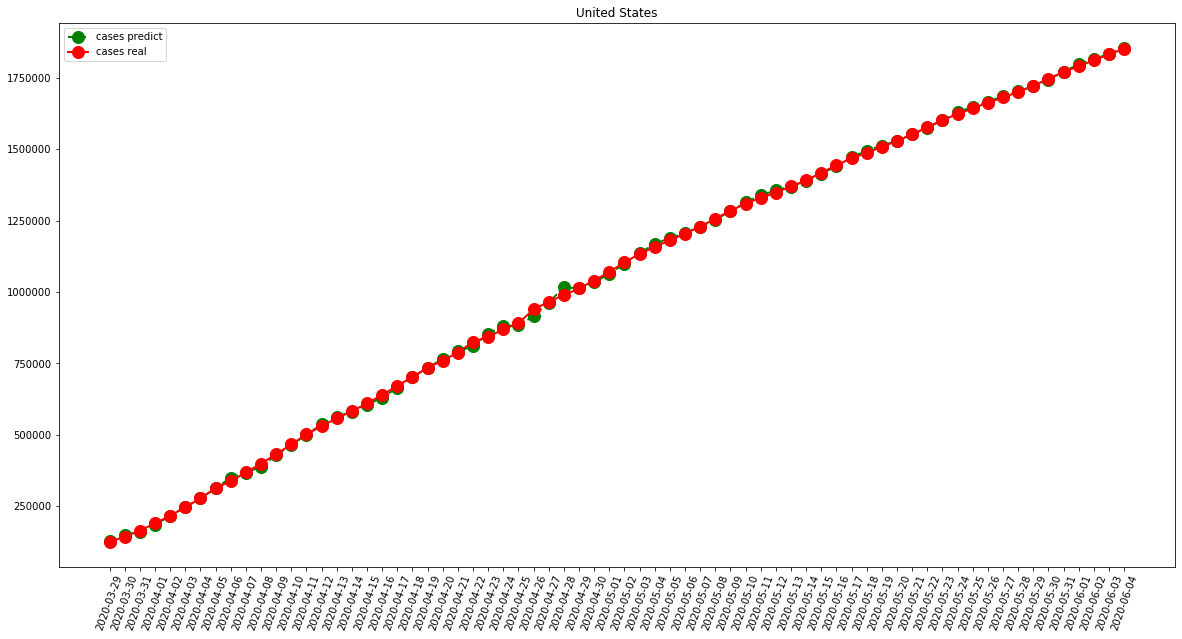

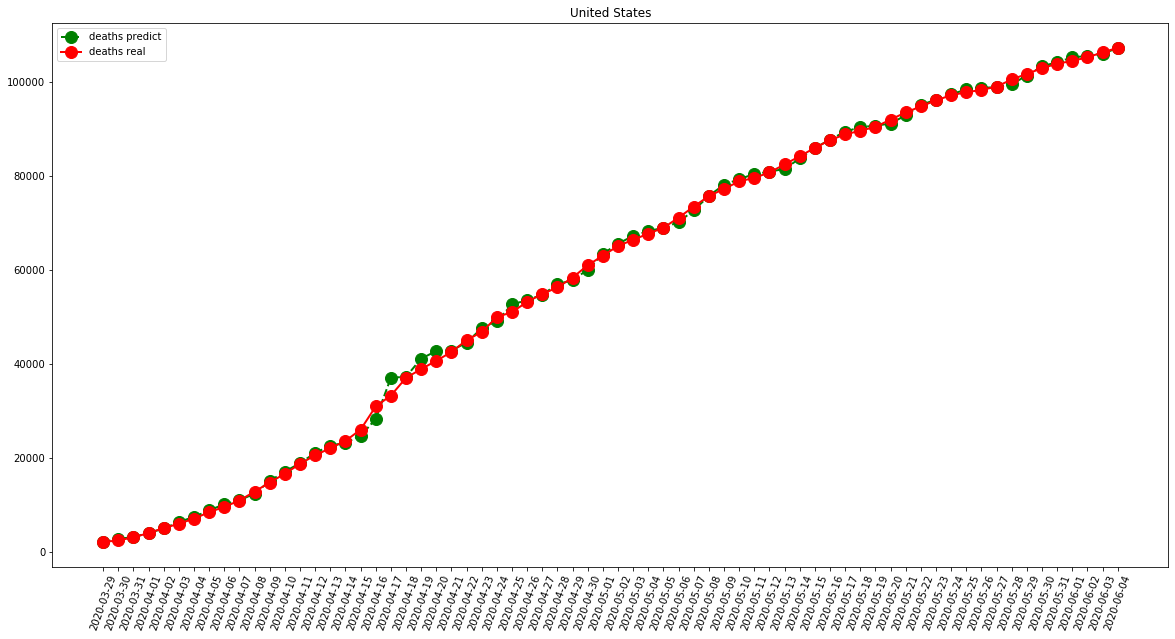

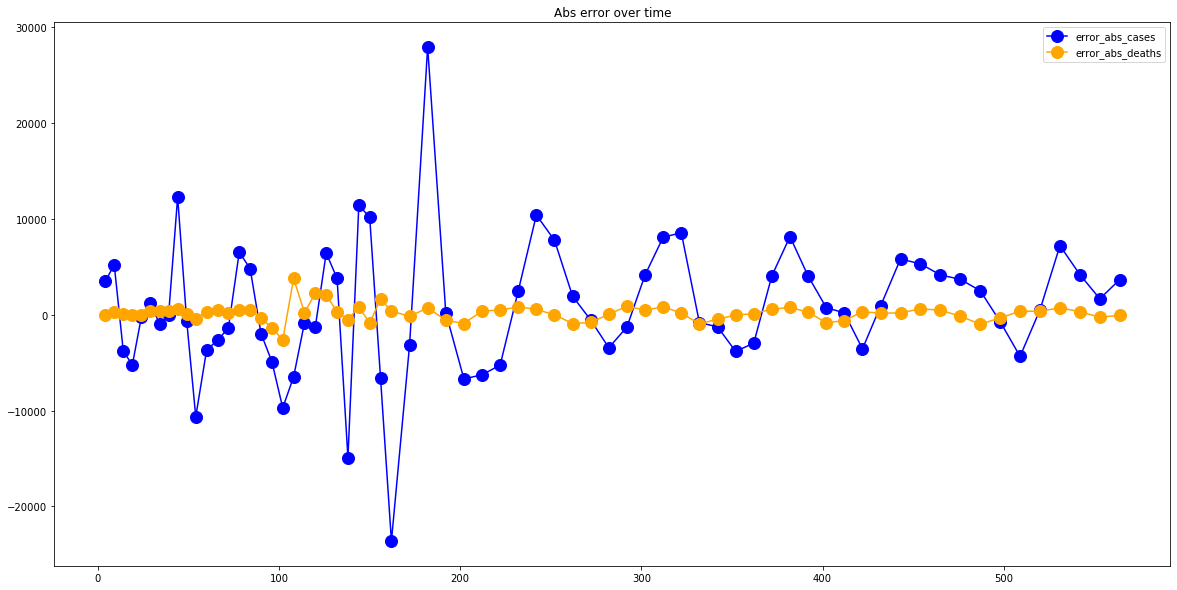

In [11]:
visShow("United States")

-- China performances for cases --
MAPE =  111.82352941176471
RMSE =  139.90585069547137
-- China performances for deaths --
MAPE =  51.0735294117647
RMSE =  190.1602652253836


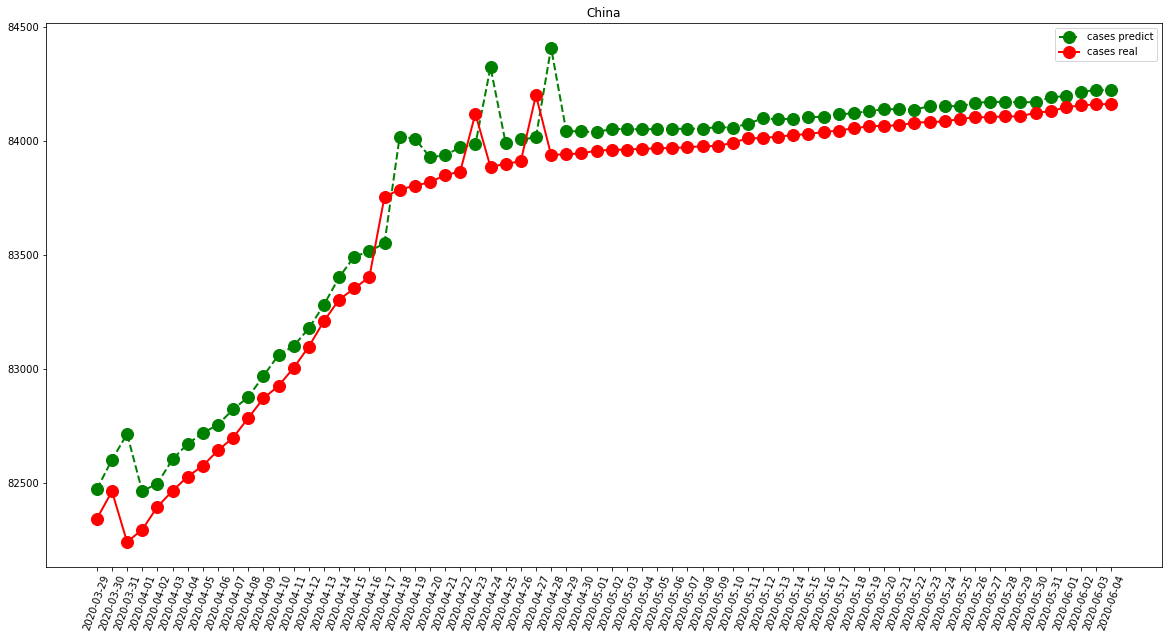

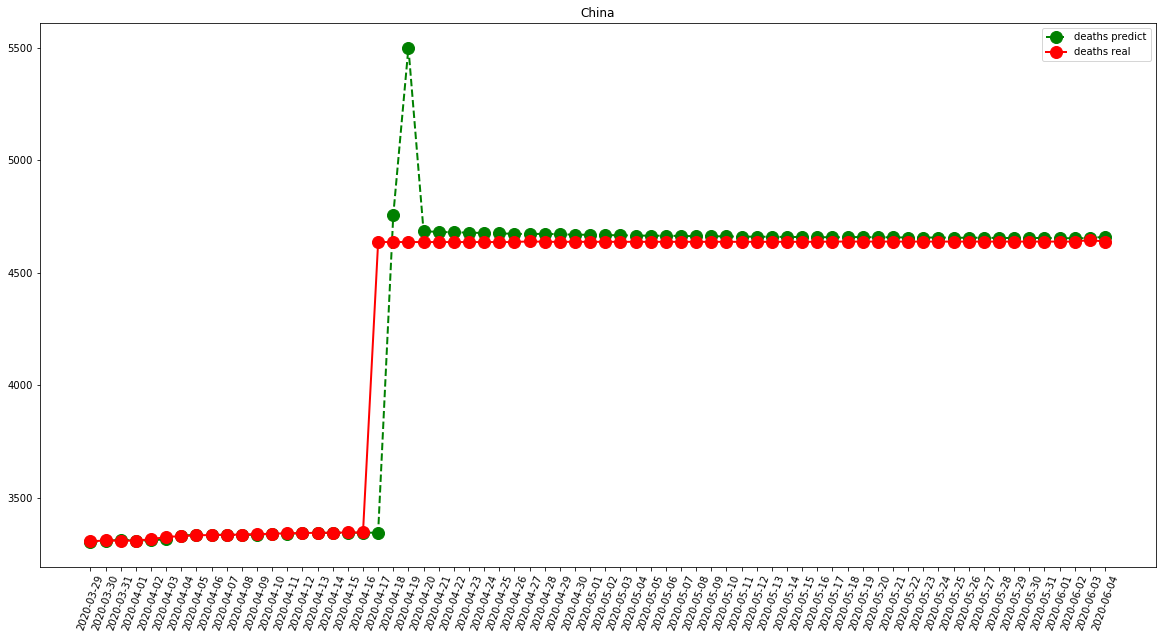

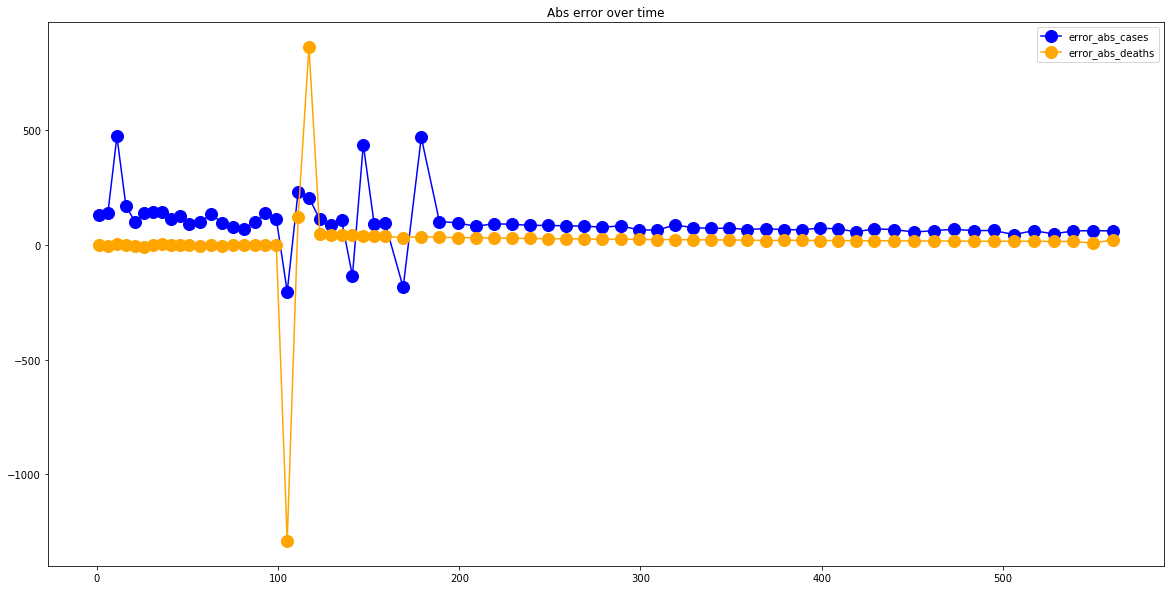

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAPE =  1075.55
RMSE =  1432.8515449968988
-- United Kingdom performances for deaths --
MAPE =  346.5
RMSE =  764.2286961374848


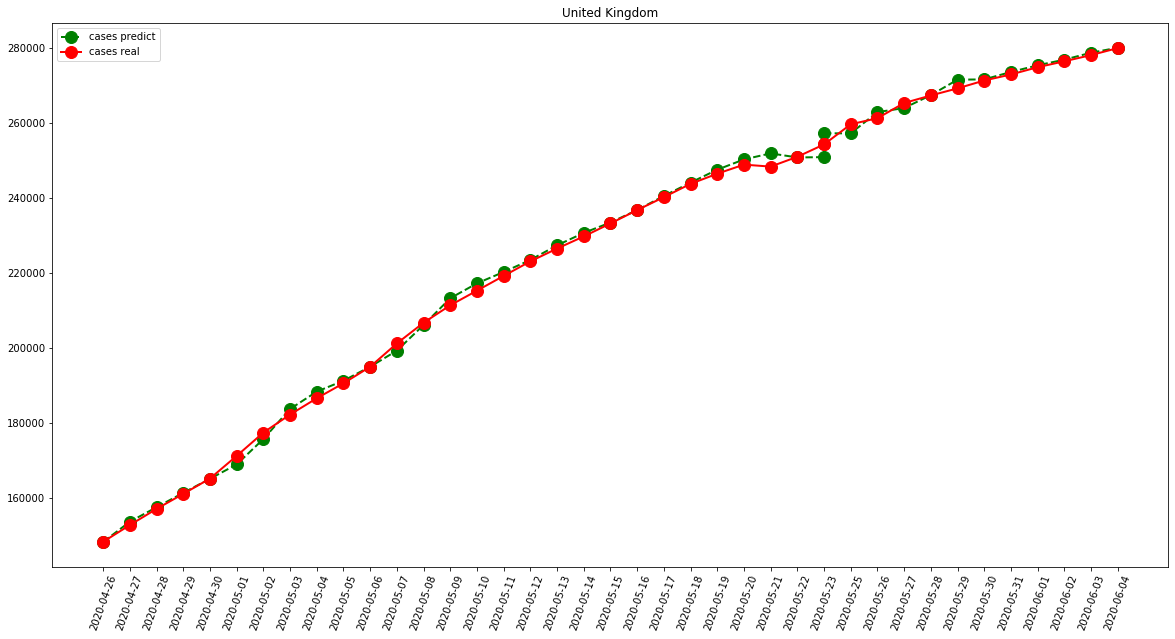

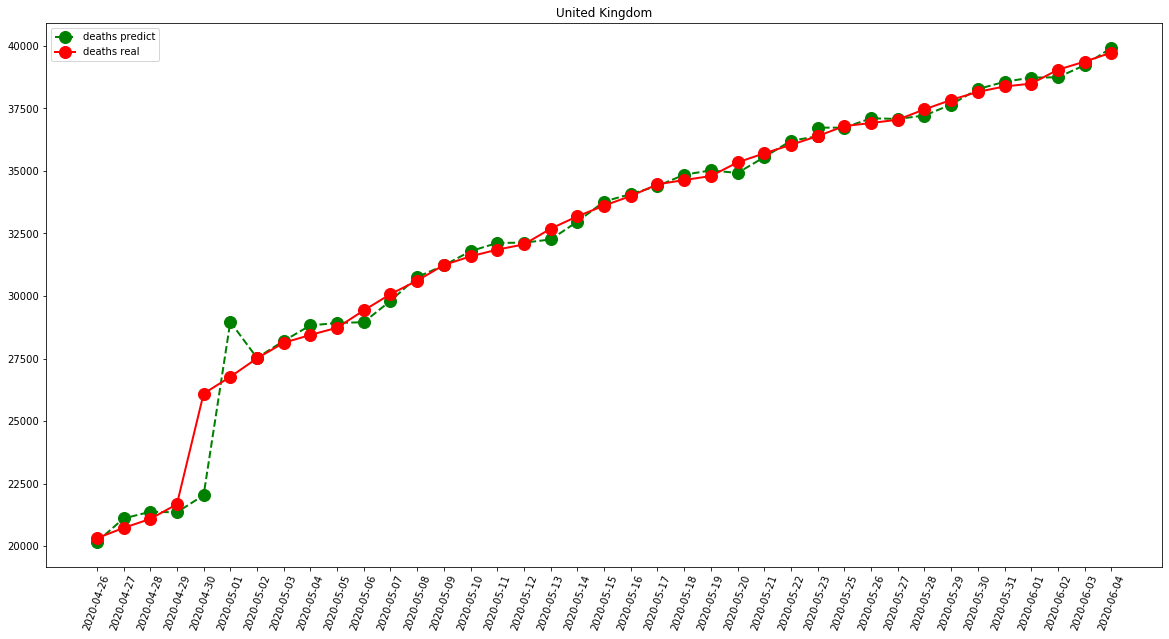

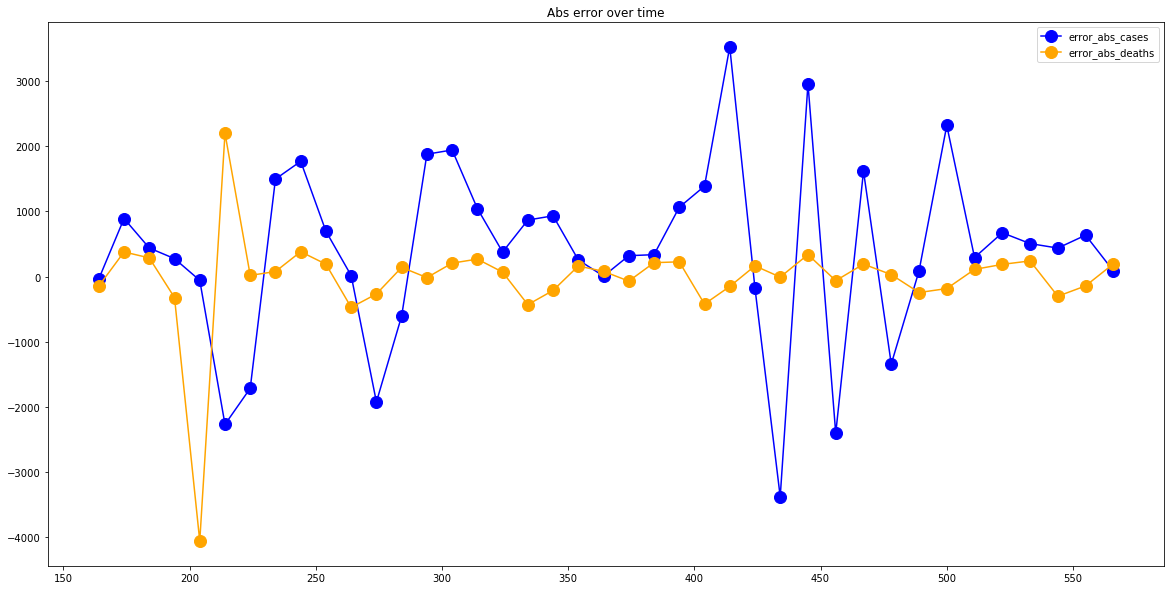

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAPE =  400.725
RMSE =  538.899642790752
-- Germany performances for deaths --
MAPE =  45.85
RMSE =  67.41031078403363


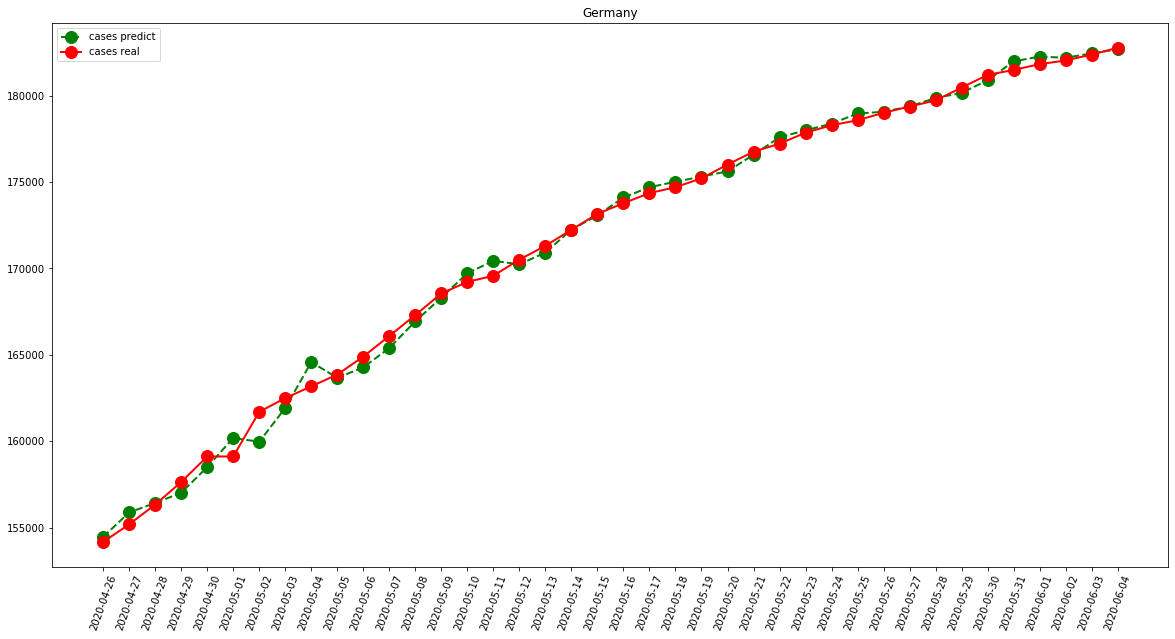

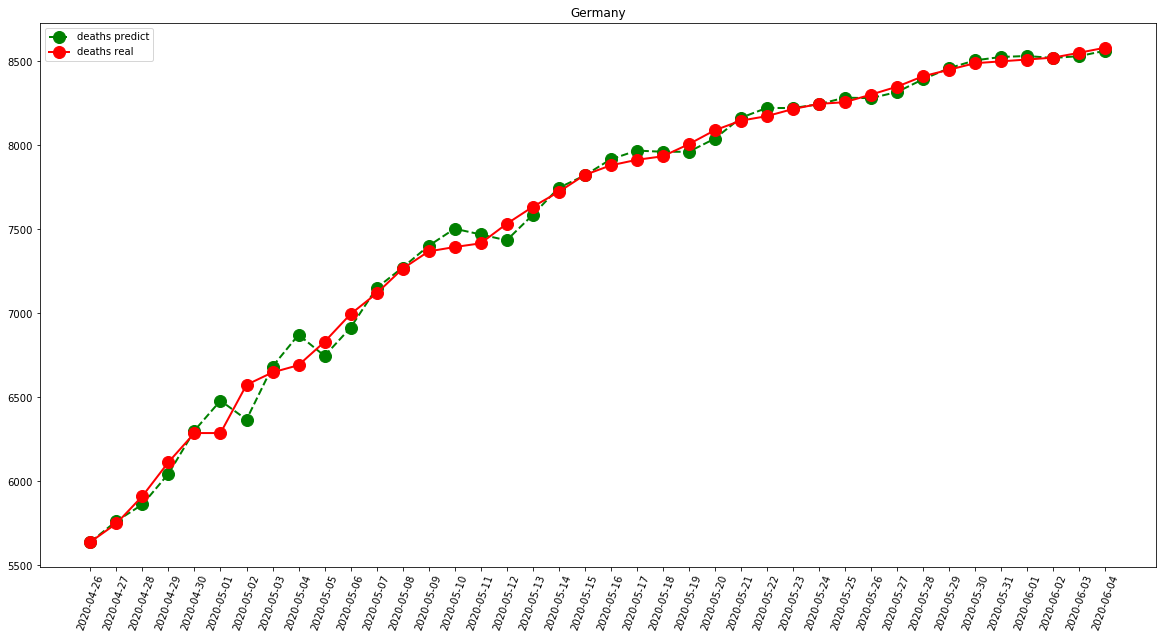

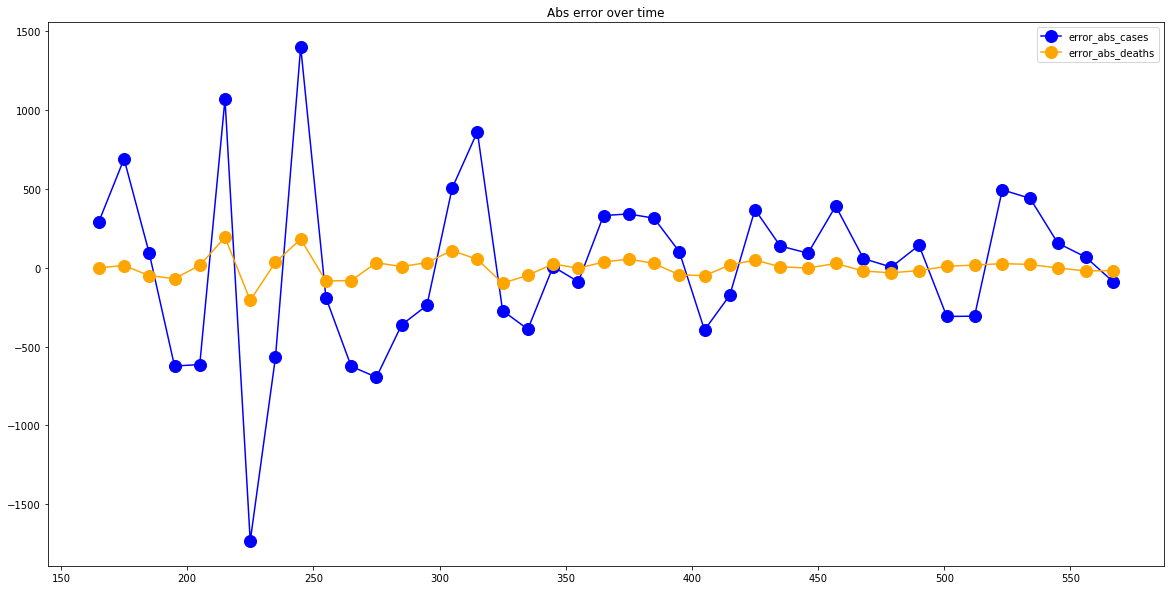

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAPE =  209.45
RMSE =  278.69499457292017
-- Iran performances for deaths --
MAPE =  12.675
RMSE =  15.851656064903755


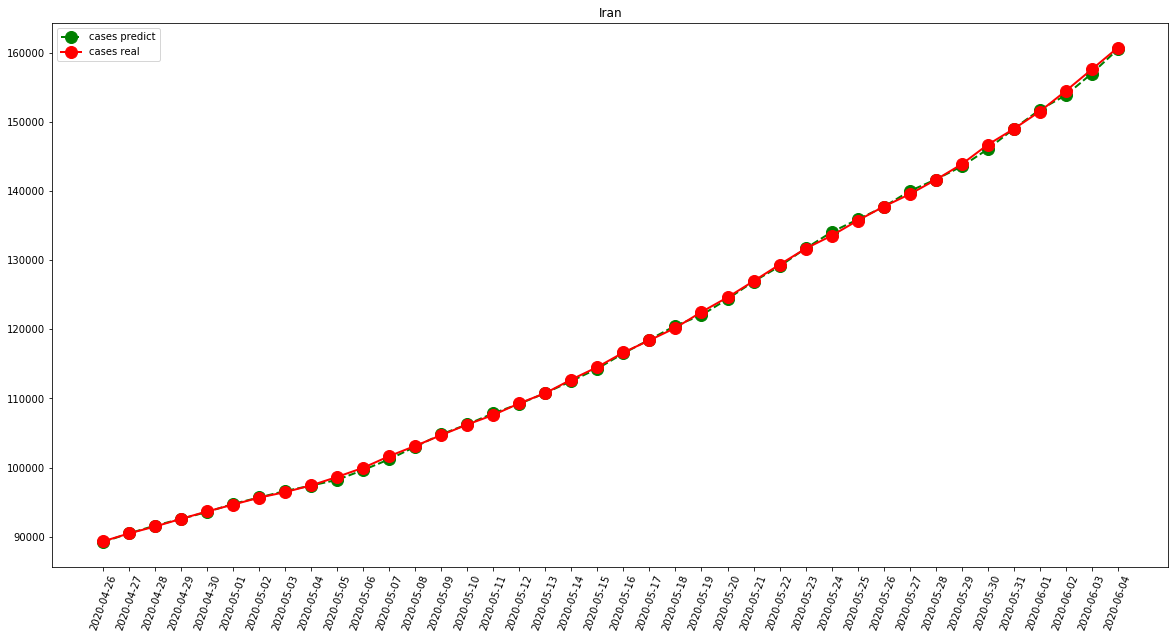

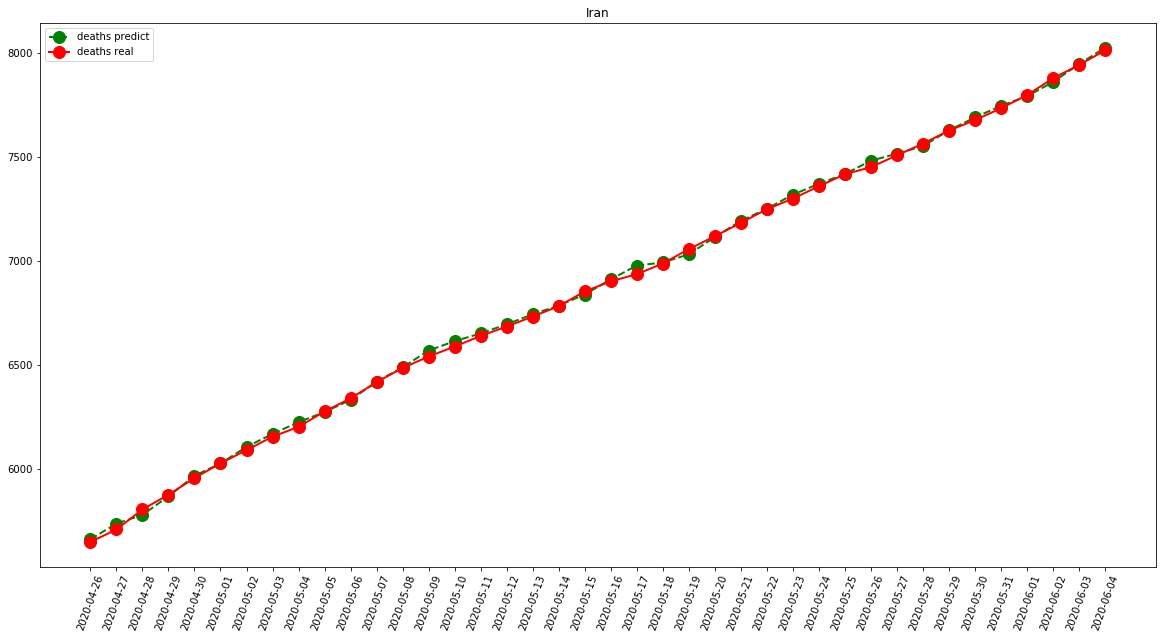

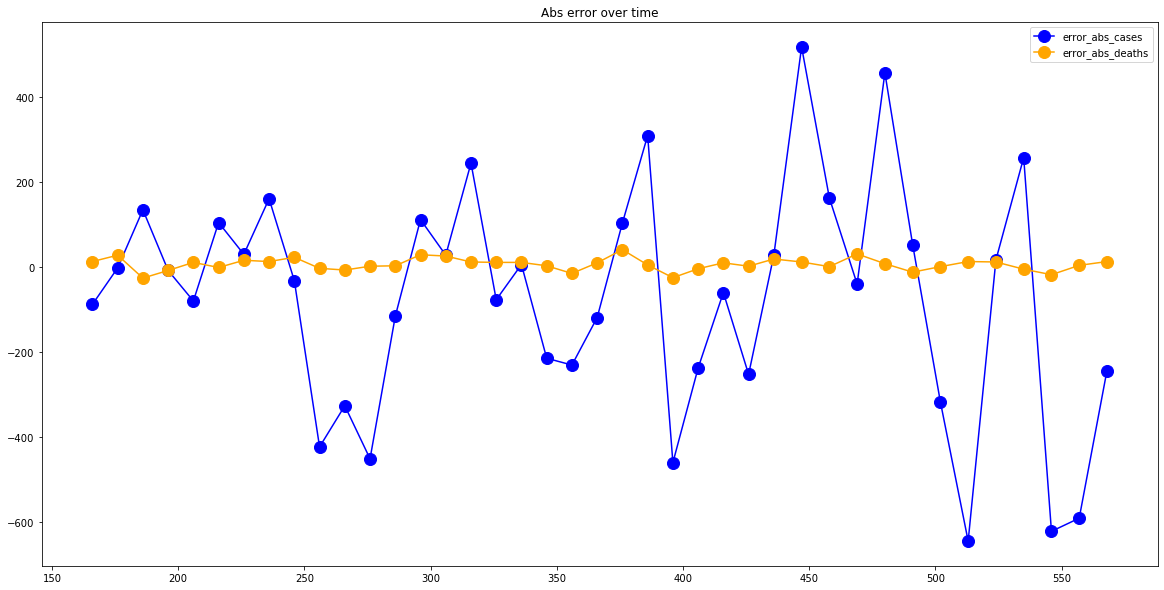

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAPE =  371.225
RMSE =  519.5694611887808
-- Turkey performances for deaths --
MAPE =  43.9
RMSE =  160.46572842822232


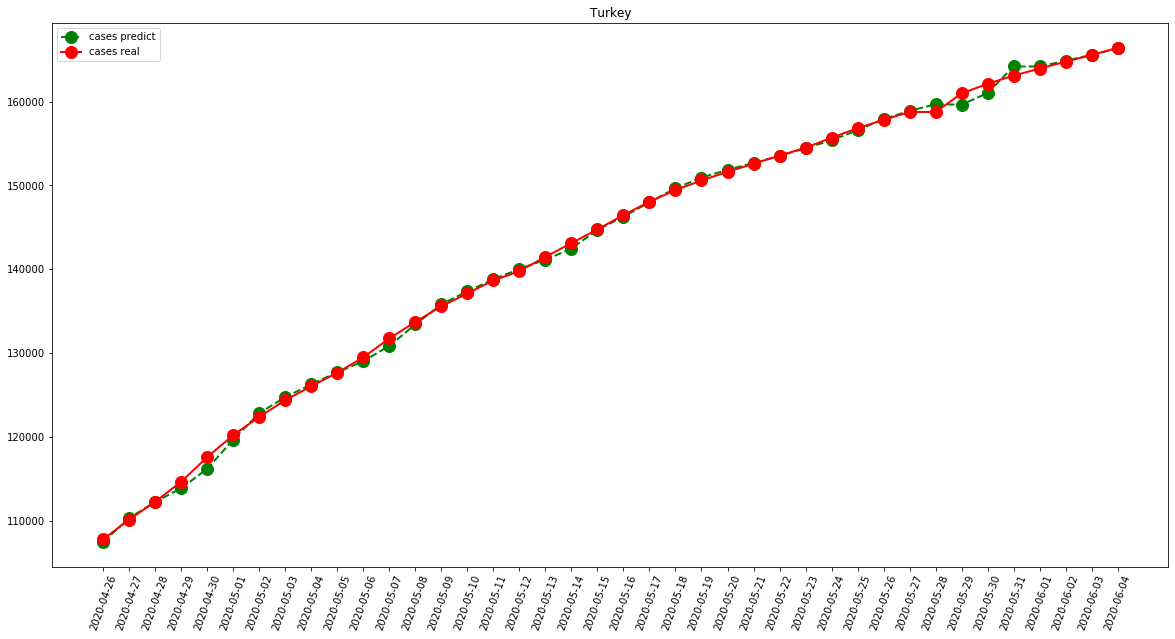

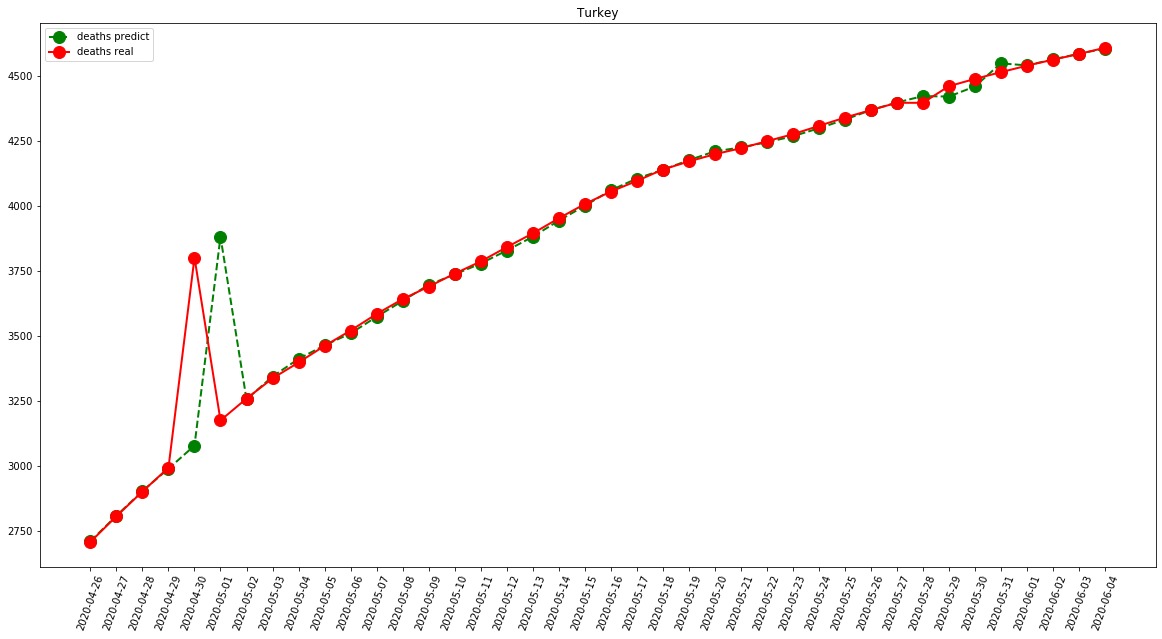

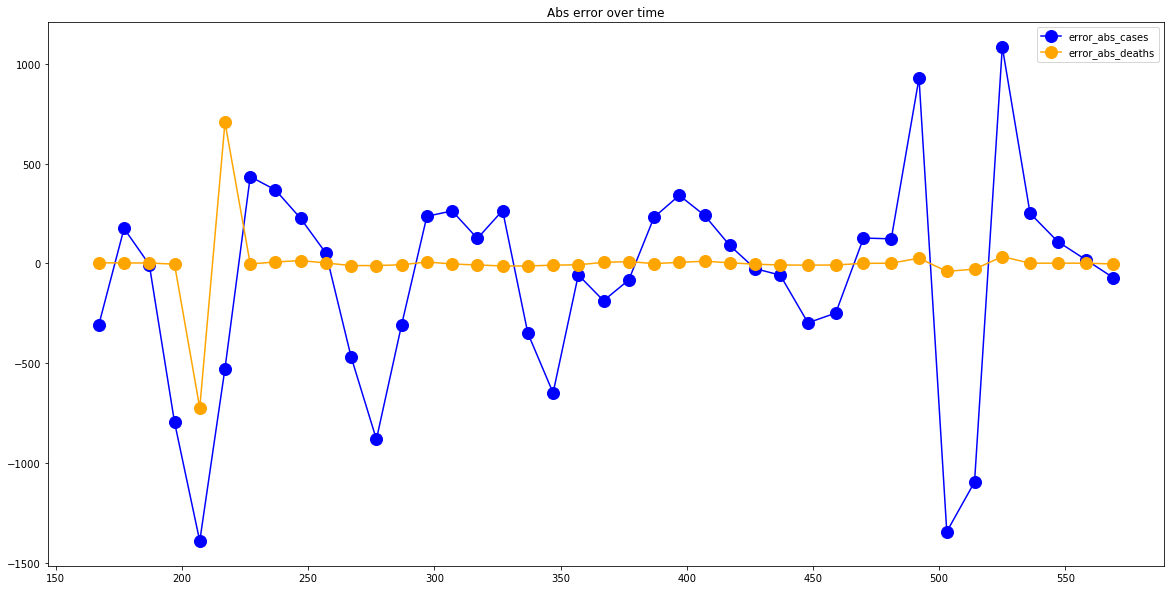

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAPE =  6609.846153846154
RMSE =  8436.964629168844
-- Brazil performances for deaths --
MAPE =  323.53846153846155
RMSE =  398.37438904396686


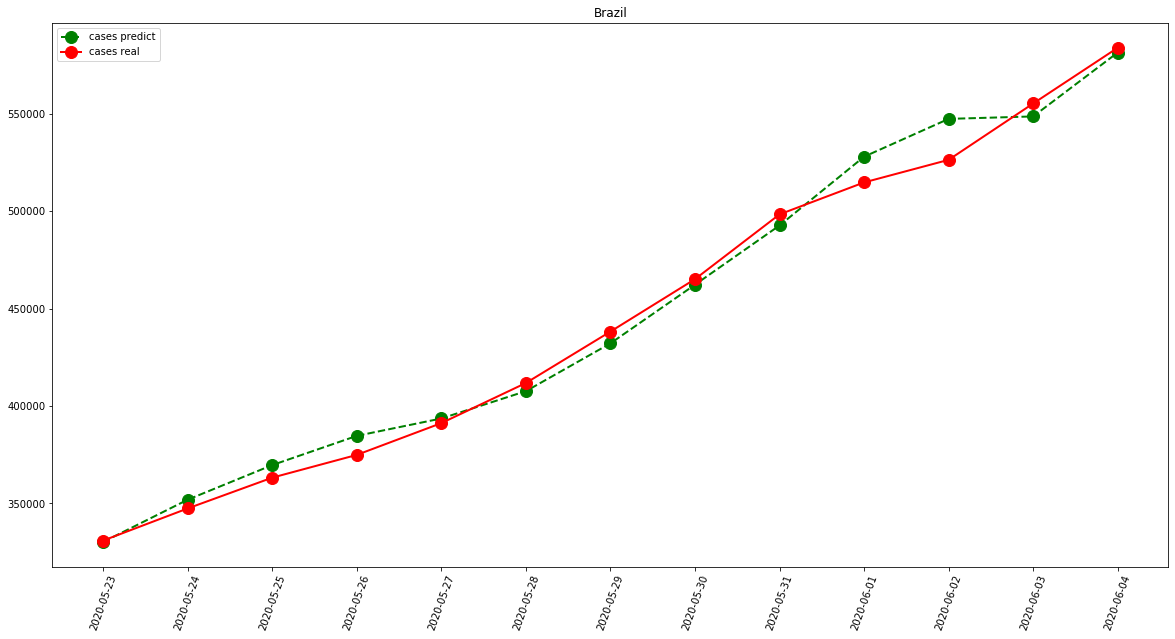

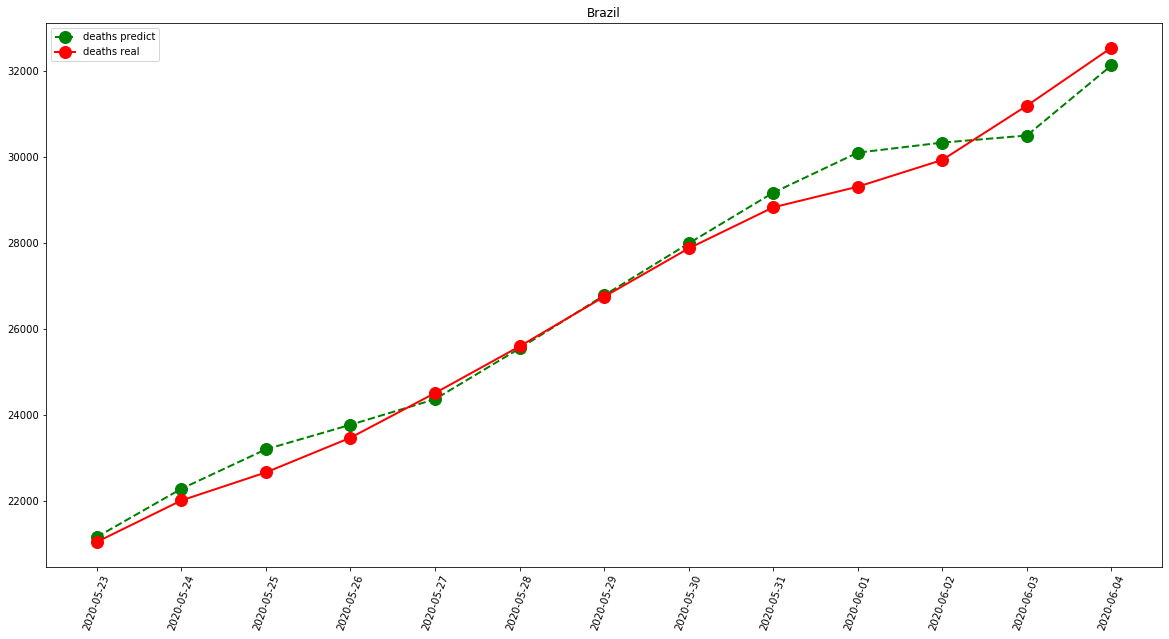

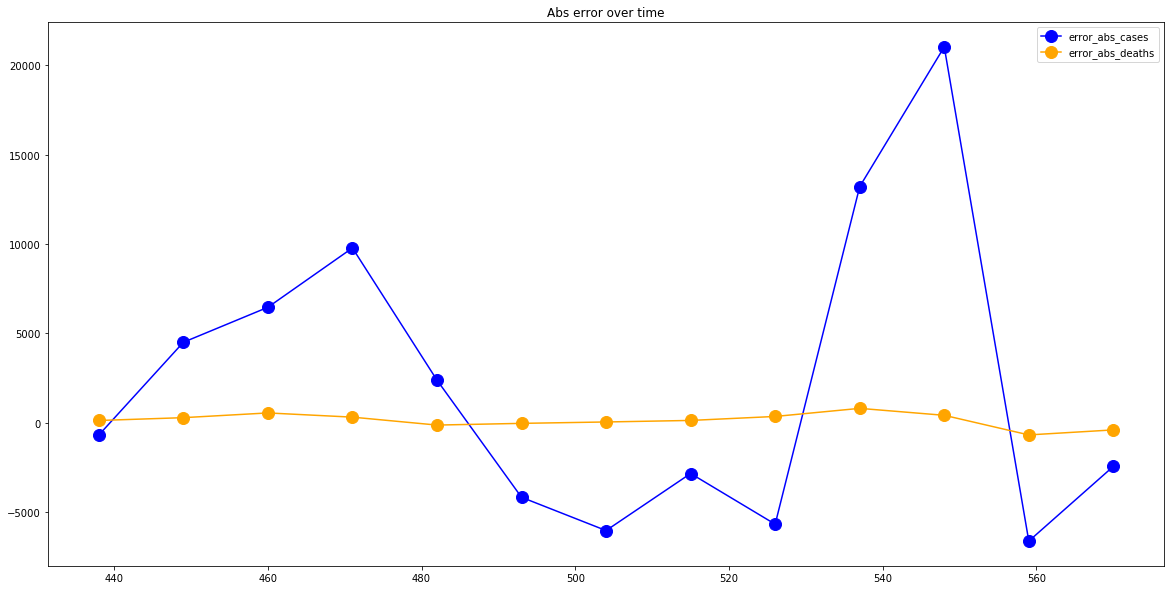

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)